In [4]:
# Polinomio interpolación
# Diferencias Divididas de Newton
# Tarea: Verificar tamaño de vectores,
#        verificar puntos equidistantes en x
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd

# INGRESO , Datos de prueba
xi = np.array([1.0, 1.3, 1.6, 1.9,2.2])
fi = np.array([0.7651977, 0.6200860, 0.4554022, 0.2818186,0.1103623])

#xi = np.array([1, 4, 5, 6,7])
#fi = np.array([1,16,25,36,49])

In [5]:

titulo = ['i   ','xi  ','fi  ']
n = len(xi)
ki = np.arange(0,n,1)
tabla = np.concatenate(([ki],[xi],[fi]),axis=0)
tabla = np.transpose(tabla)

# diferencias divididas vacia
dfinita = np.zeros(shape=(n,n-1),dtype=float)
tabla = np.concatenate((tabla,dfinita), axis=1)


In [6]:
tabla

array([[0.       , 1.       , 0.7651977, 0.       , 0.       , 0.       ,
        0.       ],
       [1.       , 1.3      , 0.620086 , 0.       , 0.       , 0.       ,
        0.       ],
       [2.       , 1.6      , 0.4554022, 0.       , 0.       , 0.       ,
        0.       ],
       [3.       , 1.9      , 0.2818186, 0.       , 0.       , 0.       ,
        0.       ],
       [4.       , 2.2      , 0.1103623, 0.       , 0.       , 0.       ,
        0.       ]])

# Interpolacion de Newton

In [7]:
# Calcula tabla, inicia en columna 3
[n,m] = np.shape(tabla)
diagonal = n-1
j = 3
while (j < m):
    # Añade título para cada columna
    titulo.append('F['+str(j-2)+']')

    # cada fila de columna
    i = 0
    paso = j-2 # inicia en 1
    while (i < diagonal):
        denominador = (xi[i+paso]-xi[i])
        numerador = tabla[i+1,j-1]-tabla[i,j-1]
        tabla[i,j] = numerador/denominador
        i = i+1
    diagonal = diagonal - 1
    j = j+1

In [9]:
pd.DataFrame(tabla)

,0,1,2,3,4,5,6
0,0.0,1.0,0.765198,-0.483706,-0.108734,0.065878,0.001825
1,1.0,1.3,0.620086,-0.548946,-0.049443,0.068069,0.000000
2,2.0,1.6,0.455402,-0.578612,0.011818,0.000000,0.000000
3,3.0,1.9,0.281819,-0.571521,0.000000,0.000000,0.000000
4,4.0,2.2,0.110362,0.000000,0.000000,0.000000,0.000000


Tabla Diferencia Dividida
[['i   ', 'xi  ', 'fi  ', 'F[1]', 'F[2]', 'F[3]', 'F[4]']]
[[ 0.0000e+00  1.0000e+00  7.6520e-01 -4.8371e-01 -1.0873e-01  6.5878e-02
   1.8251e-03]
 [ 1.0000e+00  1.3000e+00  6.2009e-01 -5.4895e-01 -4.9443e-02  6.8069e-02
   0.0000e+00]
 [ 2.0000e+00  1.6000e+00  4.5540e-01 -5.7861e-01  1.1818e-02  0.0000e+00
   0.0000e+00]
 [ 3.0000e+00  1.9000e+00  2.8182e-01 -5.7152e-01  0.0000e+00  0.0000e+00
   0.0000e+00]
 [ 4.0000e+00  2.2000e+00  1.1036e-01  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00]]
dDividida: 
[-0.4837 -0.1087  0.0659  0.0018]
polinomio: 
-0.483705666666666*x + 0.00182510288066044*(x - 1.9)*(x - 1.6)*(x - 1.3)*(x - 1.0) + 0.0658783950617283*(x - 1.6)*(x - 1.3)*(x - 1.0) - 0.108733888888889*(x - 1.3)*(x - 1.0) + 1.24890336666667
polinomio simplificado: 
0.00182510288066044*x**4 + 0.0552927983538978*x**3 - 0.343046604938247*x**2 + 0.0733913477366034*x + 0.977735055967085


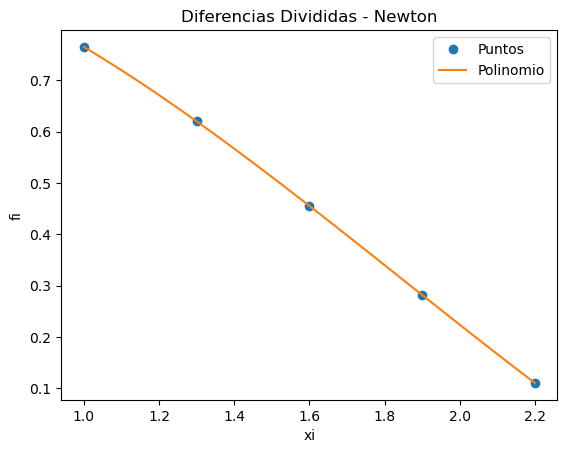

In [8]:
# POLINOMIO con diferencias Divididas
# caso: puntos equidistantes en eje x
dDividida = tabla[0,3:]
n = len(dfinita)

# expresión del polinomio con Sympy
x = sym.Symbol('x')
polinomio = fi[0]
for j in range(1,n,1):
    factor = dDividida[j-1]
    termino = 1
    for k in range(0,j,1):
        termino = termino*(x-xi[k])
    polinomio = polinomio + termino*factor

# simplifica multiplicando entre (x-xi)
polisimple = polinomio.expand()

# polinomio para evaluacion numérica
px = sym.lambdify(x,polisimple)

# Puntos para la gráfica
muestras = 101
a = np.min(xi)
b = np.max(xi)
pxi = np.linspace(a,b,muestras)
pfi = px(pxi)

# SALIDA
np.set_printoptions(precision = 4)
print('Tabla Diferencia Dividida')
print([titulo])
print(tabla)
print('dDividida: ')
print(dDividida)
print('polinomio: ')
print(polinomio)
print('polinomio simplificado: ' )
print(polisimple)

# Gráfica
plt.plot(xi,fi,'o', label = 'Puntos')
##for i in range(0,n,1):
##    plt.axvline(xi[i],ls='--', color='yellow')
plt.plot(pxi,pfi, label = 'Polinomio')
plt.legend()
plt.xlabel('xi')
plt.ylabel('fi')
plt.title('Diferencias Divididas - Newton')
plt.show()

# Newton progresiva

In [432]:
progresiva = tabla[0,2:]

In [433]:
progresiva

array([ 0.7652, -0.4837, -0.1087,  0.0659,  0.0018])

# Newton regresiva

In [439]:
tabla_2 = tabla[:,2:]

In [440]:
pd.DataFrame(tabla_2)

,0,1,2,3,4
0,0.765198,-0.483706,-0.108734,0.065878,0.001825
1,0.620086,-0.548946,-0.049443,0.068069,0.000000
2,0.455402,-0.578612,0.011818,0.000000,0.000000
3,0.281819,-0.571521,0.000000,0.000000,0.000000
4,0.110362,0.000000,0.000000,0.000000,0.000000


In [446]:
i = 0
for j in range(len(tabla_2)-1,-1,-1):
    print(tabla_2[j,i])
    i=i+1

0.1103623
-0.5715209999999994
0.011818333333334928
0.06806851851852086
0.0018251028806604353
